## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path("./Resources/bitstamp.csv")
bitstamp = pd.read_csv(csvpath, index_col="Timestamp", parse_dates=True, infer_datetime_format=True)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path("./Resources/coinbase.csv")
coinbase = pd.read_csv(csvpath, index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

/var/folders/0r/21lfq05d02q2rck_592dq44c0000gn/T/ipykernel_85536/3755717188.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


In [8]:
#Look at the datatypes
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [10]:
# Review the data for duplicate values, and drop them if necessary
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [11]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase = coinbase.drop_duplicates()

/var/folders/0r/21lfq05d02q2rck_592dq44c0000gn/T/ipykernel_85536/3566375658.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, "Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [13]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [14]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [15]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Closing Prices'}, xlabel='Timestamp'>

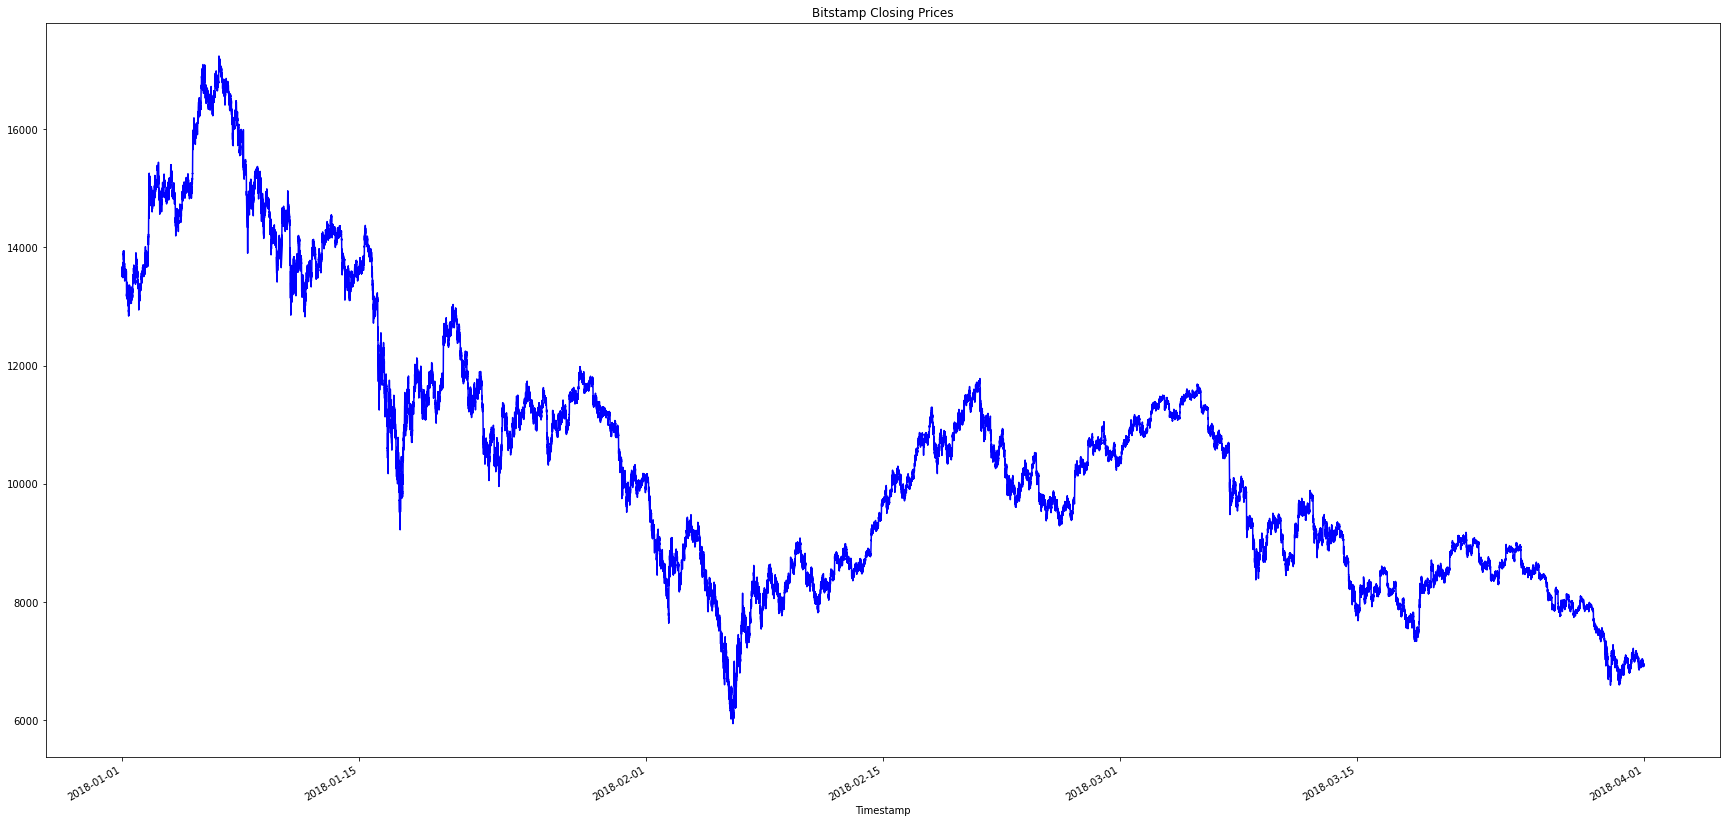

In [16]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(30, 15), title="Bitstamp Closing Prices", color="blue")

<AxesSubplot:title={'center':'Coinbase Cosing Prices'}, xlabel='Timestamp'>

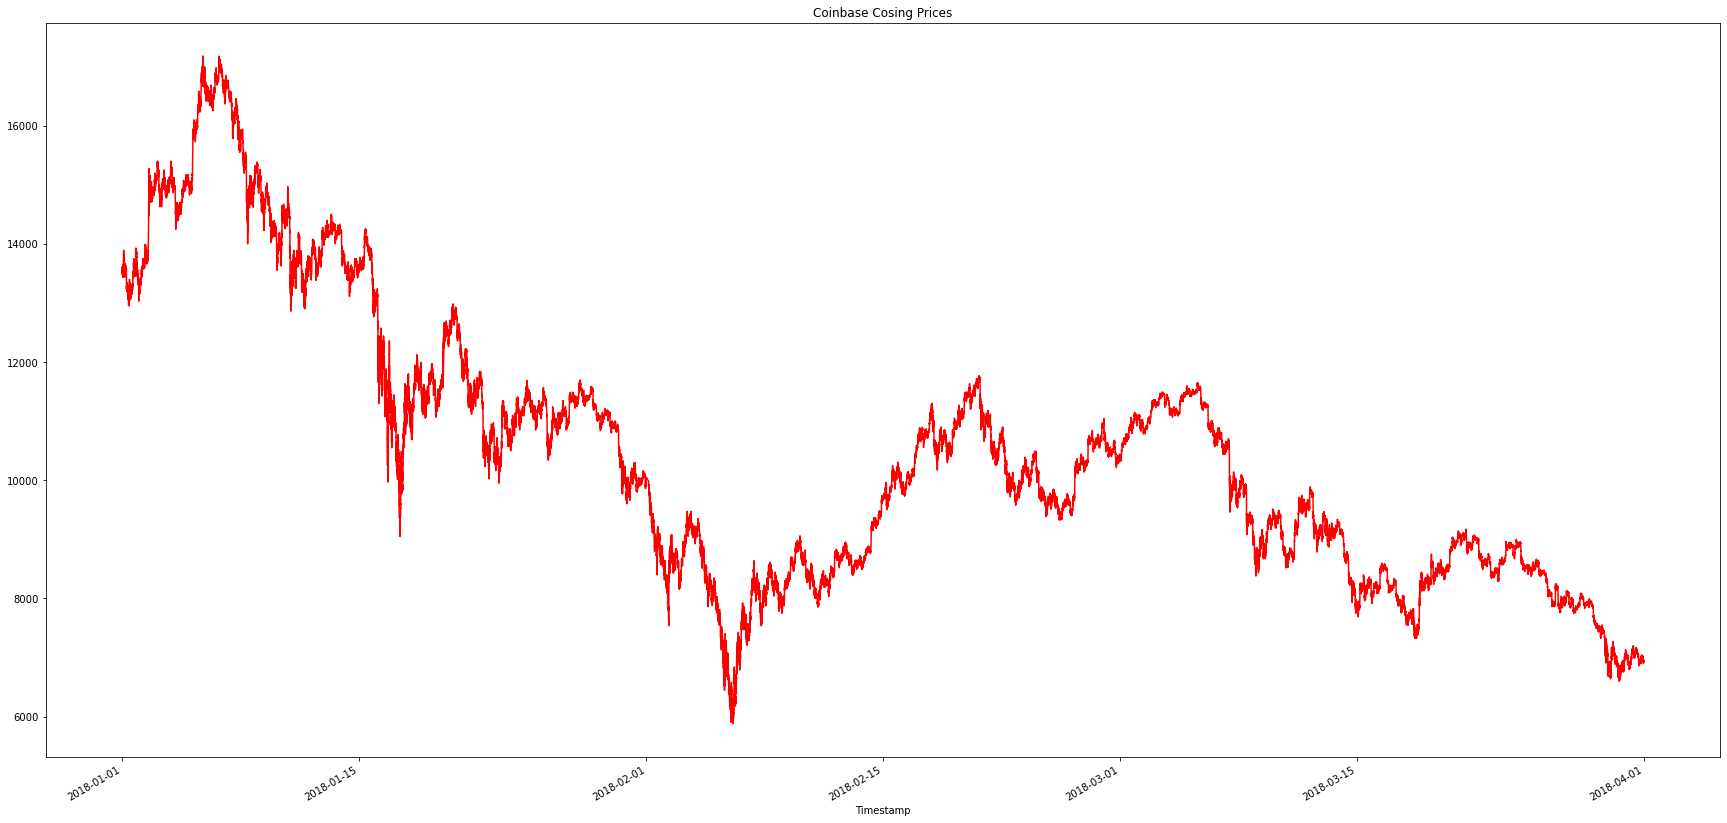

In [17]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(30, 15), title="Coinbase Cosing Prices", color="red")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

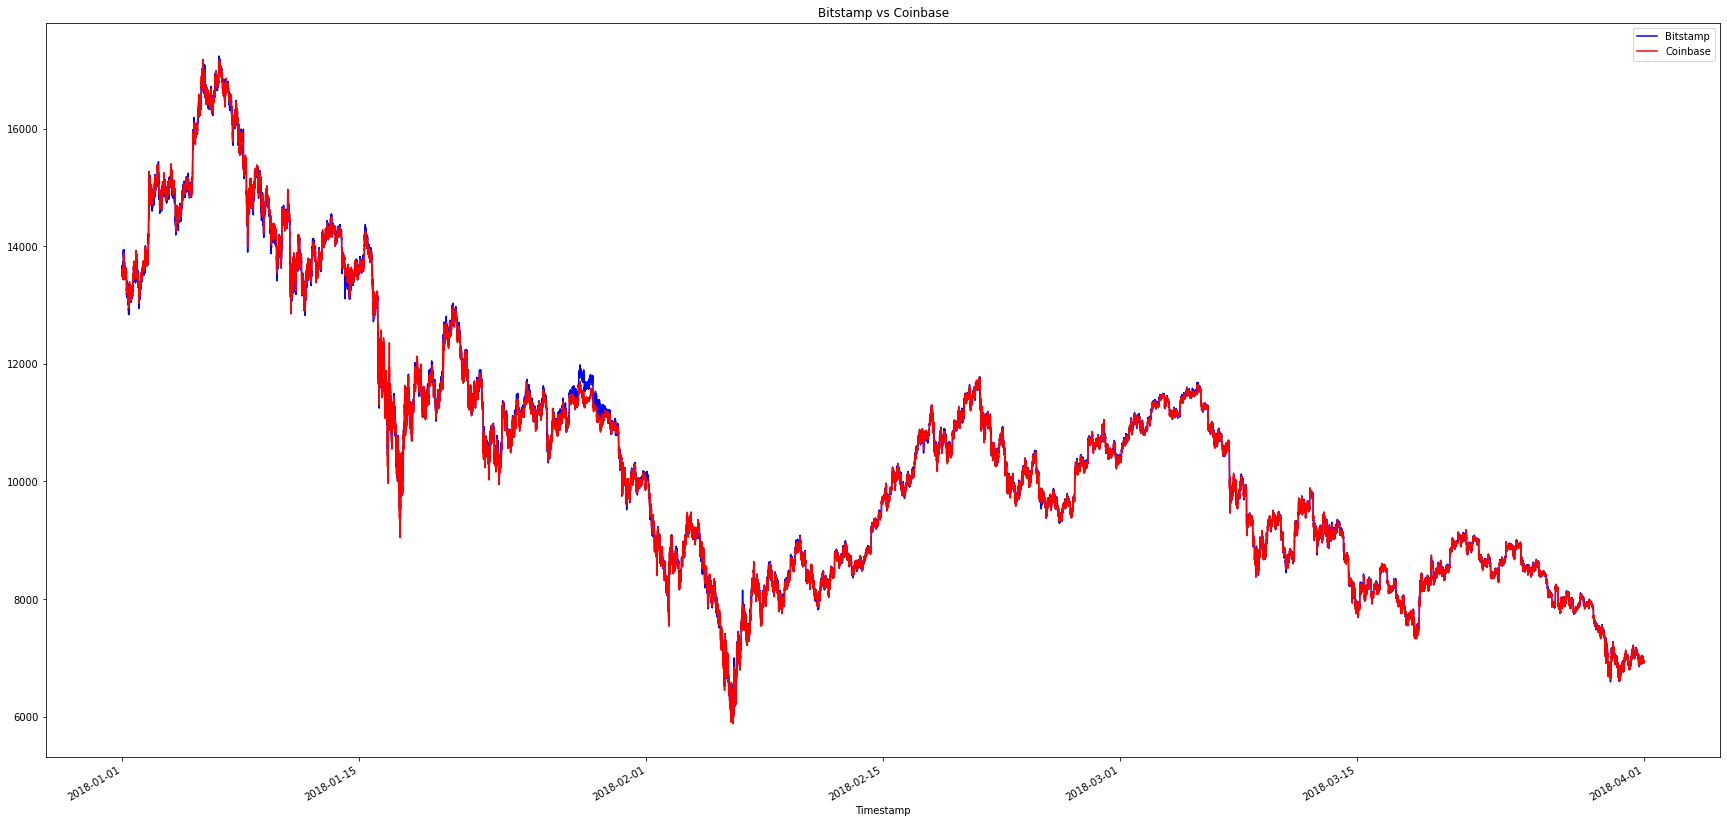

In [18]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(30, 15), title="Bitstamp vs Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(30, 15), color="red", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (January Time Period)'}, xlabel='Timestamp'>

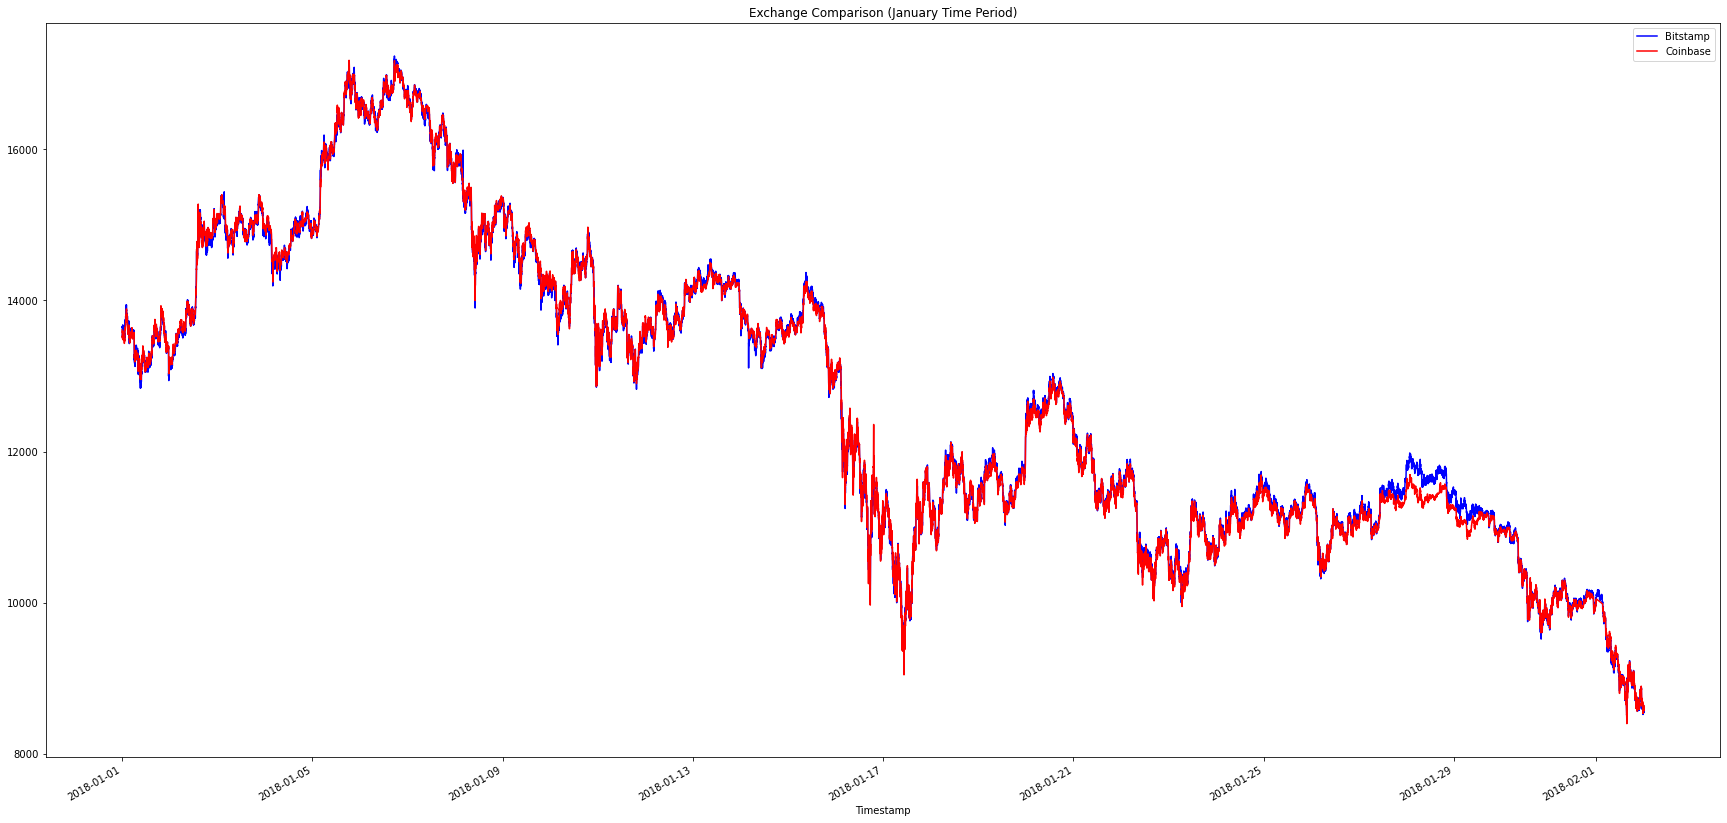

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(30, 15), title="Exchange Comparison (January Time Period)", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(30, 15), color="red", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (February Time Period)'}, xlabel='Timestamp'>

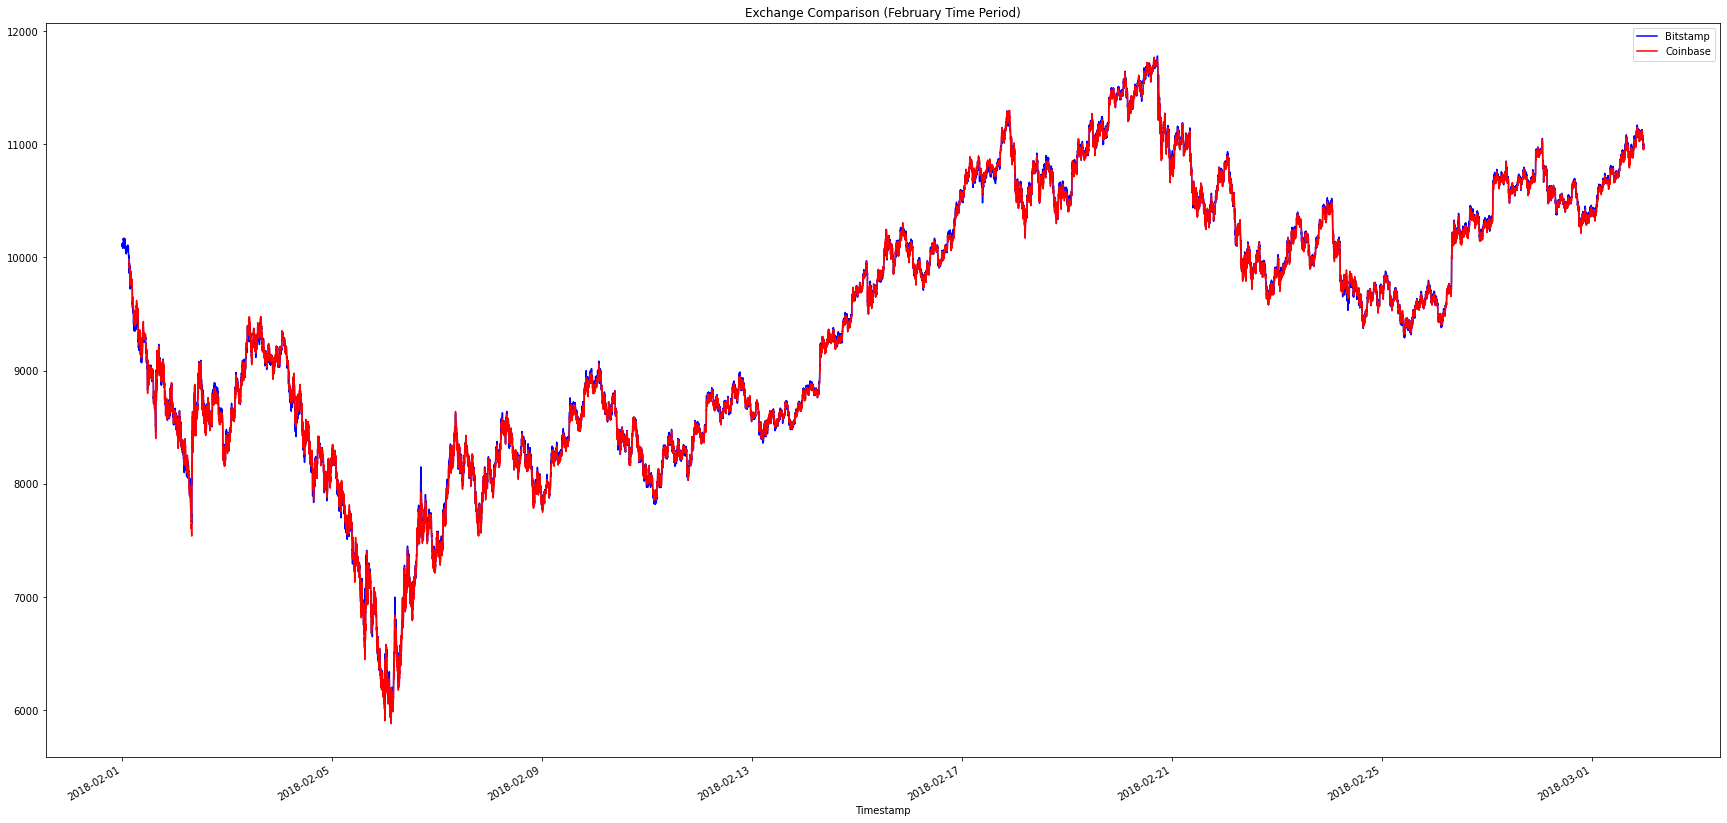

In [20]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period middle in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-02-01':'2018-03-01'].plot(legend=True, figsize=(30, 15), title="Exchange Comparison (February Time Period)", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-02-01':'2018-03-01'].plot(legend=True, figsize=(30, 15), color="red", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (March Time Period)'}, xlabel='Timestamp'>

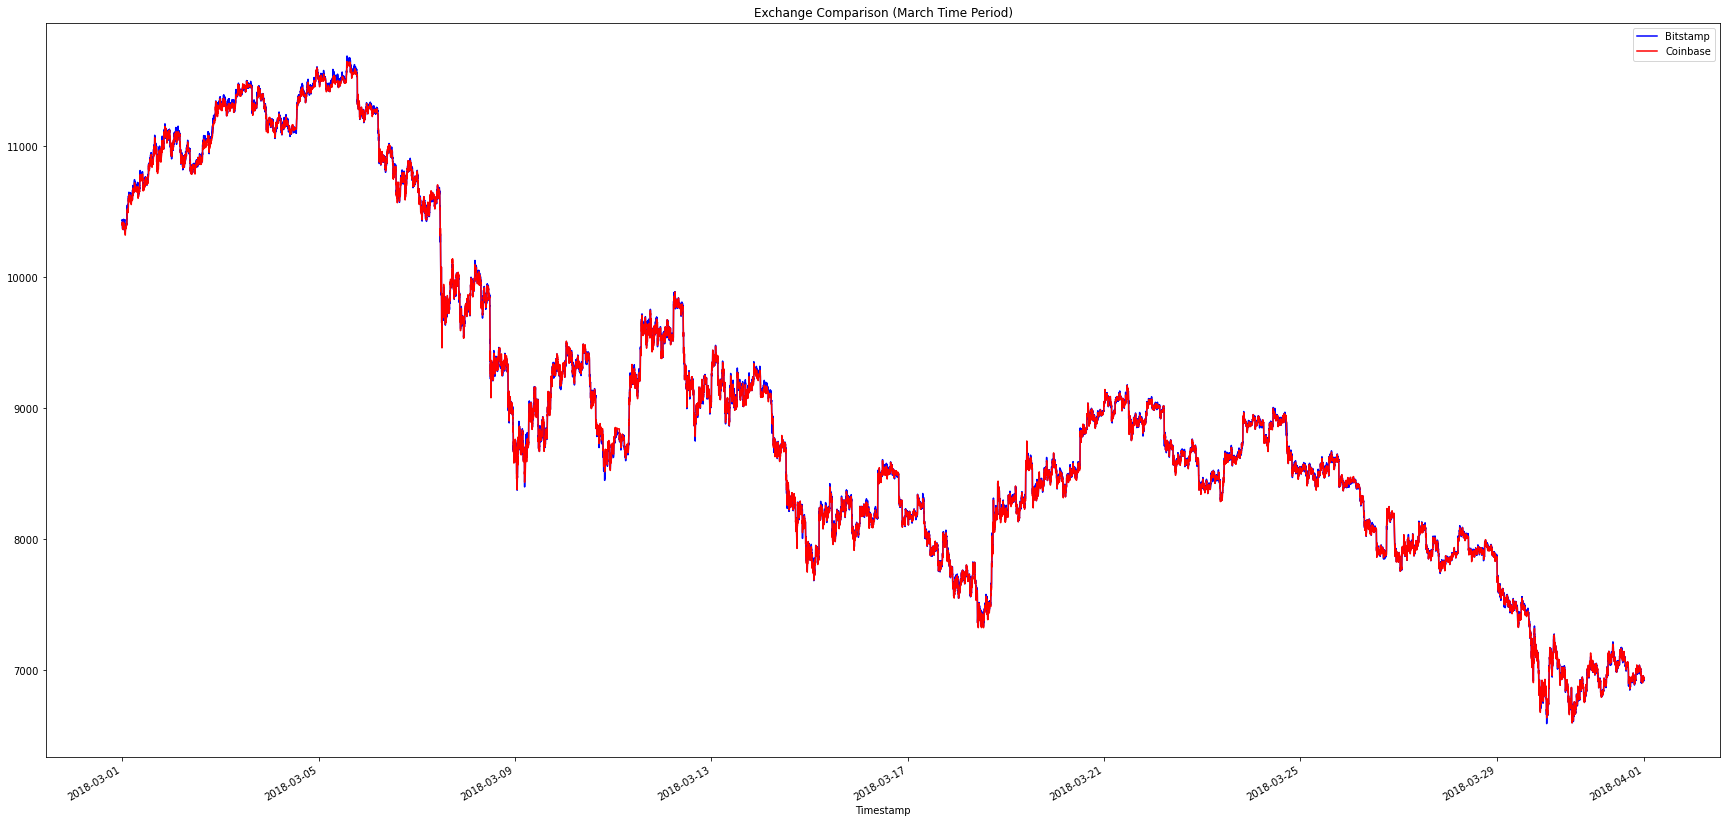

In [21]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(30, 15), title="Exchange Comparison (March Time Period)", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(30, 15), color="red", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The spread changed as time progressed. In the dataset from January of 2018, we saw significant spreads between the closing price in Bitstamp and Coinbase, specially in the last week. In the February and March dataset, the closing prices spread are smaller, at a high level view.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

In [24]:
# Create a slice for early date in the dataset
# Create variables that are easy to adjust all through out the app, in case I want to use a different date
bitstamp_sliced_early = bitstamp_sliced.loc['2018-01-16']
coinbase_sliced_early = coinbase_sliced.loc['2018-01-16']
early_slice_plot_title = "January 16, 2018"

<AxesSubplot:title={'center':'January 16, 2018'}, xlabel='Timestamp'>

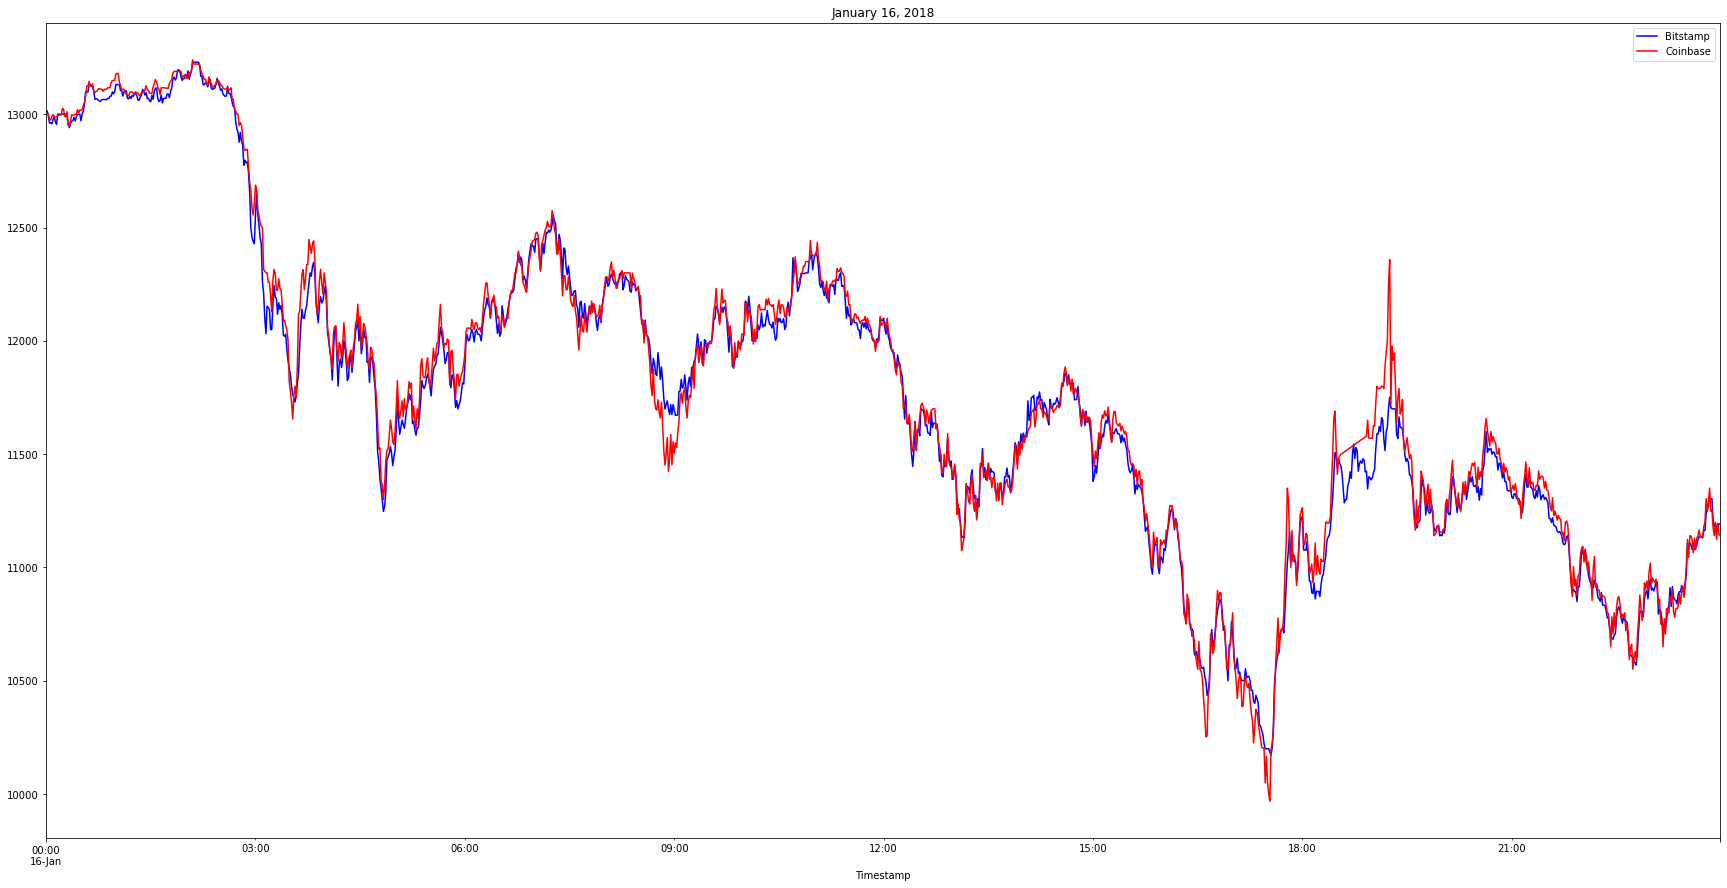

In [25]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label`
bitstamp_sliced_early.plot(legend=True, figsize=(30, 15), title=early_slice_plot_title, color="blue", label="Bitstamp")
coinbase_sliced_early.plot(legend=True, figsize=(30, 15), color="red", label="Coinbase")

In [26]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced_early - bitstamp_sliced_early

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

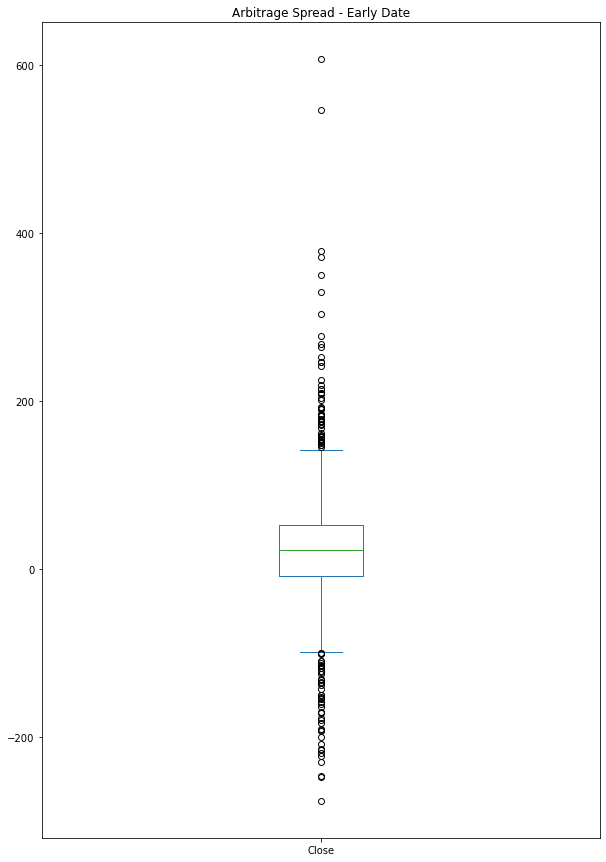

In [27]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", legend=True, figsize=(10, 15), title="Arbitrage Spread - Early Date", label="Close")

In [28]:
# Create a slice for middle date in the dataset
# Create variables that are easy to adjust all through out the app, in case I want to use a different date
bitstamp_sliced_middle = bitstamp_sliced.loc['2018-02-24']
coinbase_sliced_middle = coinbase_sliced.loc['2018-02-24']
middle_slice_plot_title = "February 24, 2018"

<AxesSubplot:title={'center':'February 24, 2018'}, xlabel='Timestamp'>

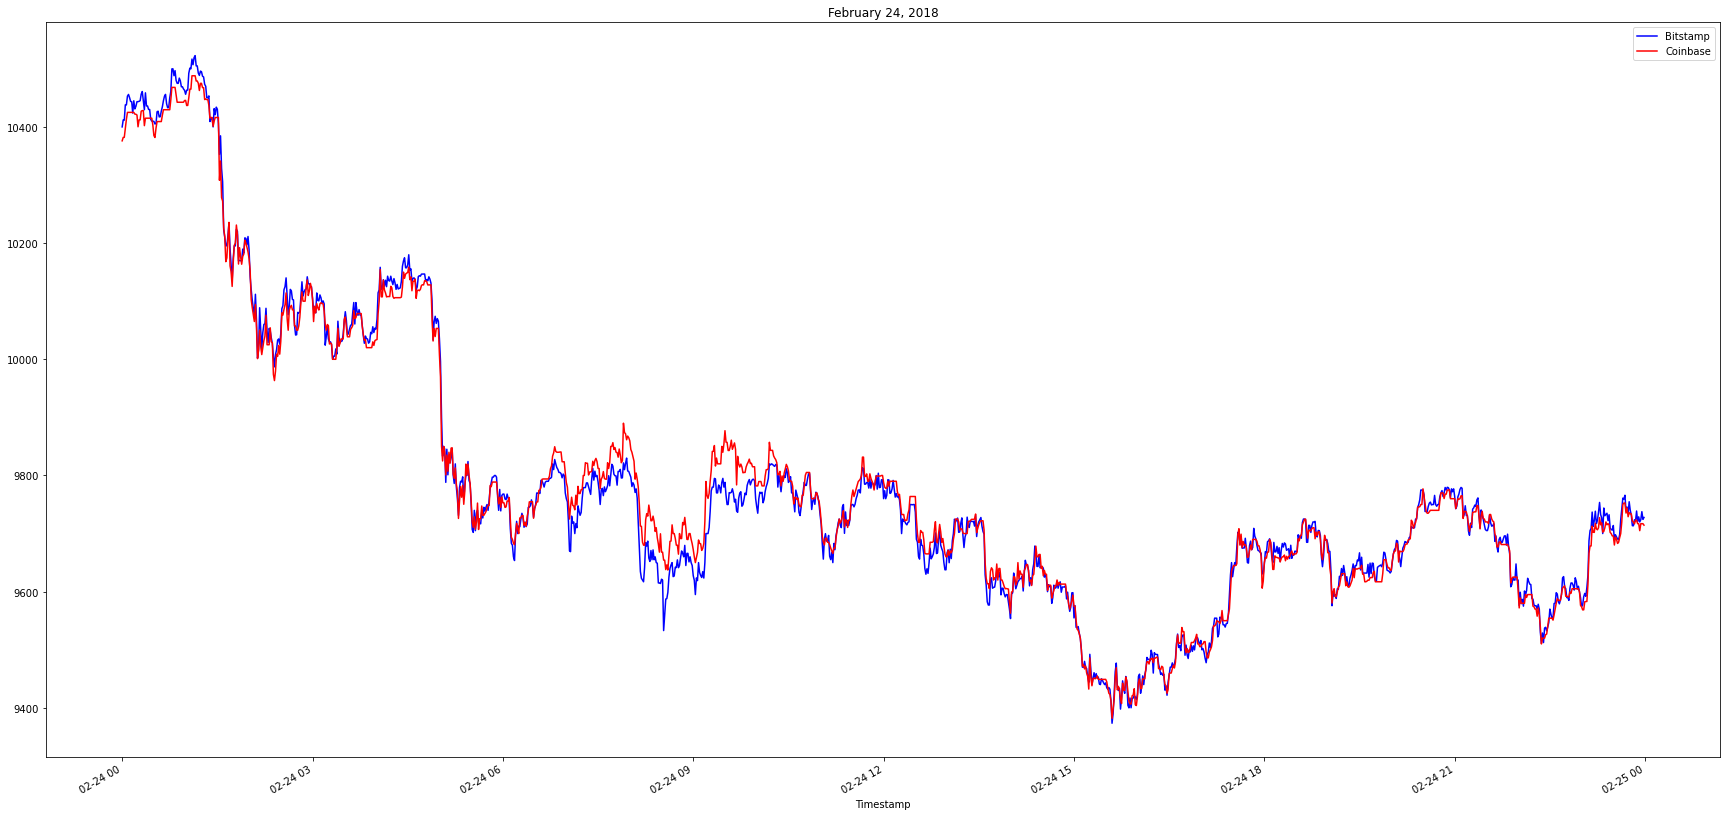

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced_middle.plot(legend=True, figsize=(30, 15), title=middle_slice_plot_title, color="blue", label="Bitstamp")
coinbase_sliced_middle.plot(legend=True, figsize=(30, 15), color="red", label="Coinbase")

In [30]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced_middle - bitstamp_sliced_middle

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

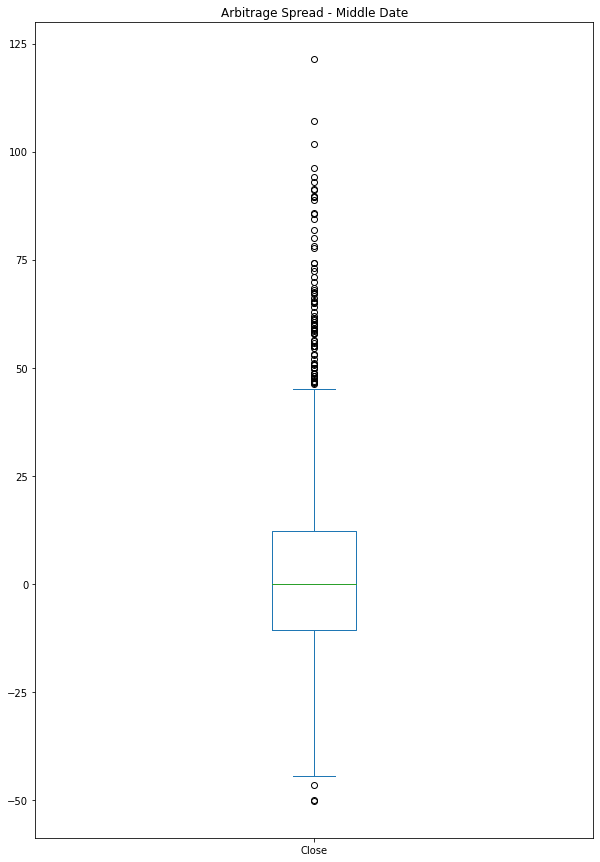

In [31]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', legend=True, figsize=(10, 15), title="Arbitrage Spread - Middle Date", label="Close")

In [32]:
# Create a slice for late date in the dataset
# Create variables that are easy to adjust all through out the app, in case I want to use a different date
bitstamp_sliced_late = bitstamp_sliced.loc['2018-03-27']
coinbase_sliced_late = coinbase_sliced.loc['2018-03-27']
late_slice_plot_title = "March 27, 2018"

<AxesSubplot:title={'center':'March 27, 2018'}, xlabel='Timestamp'>

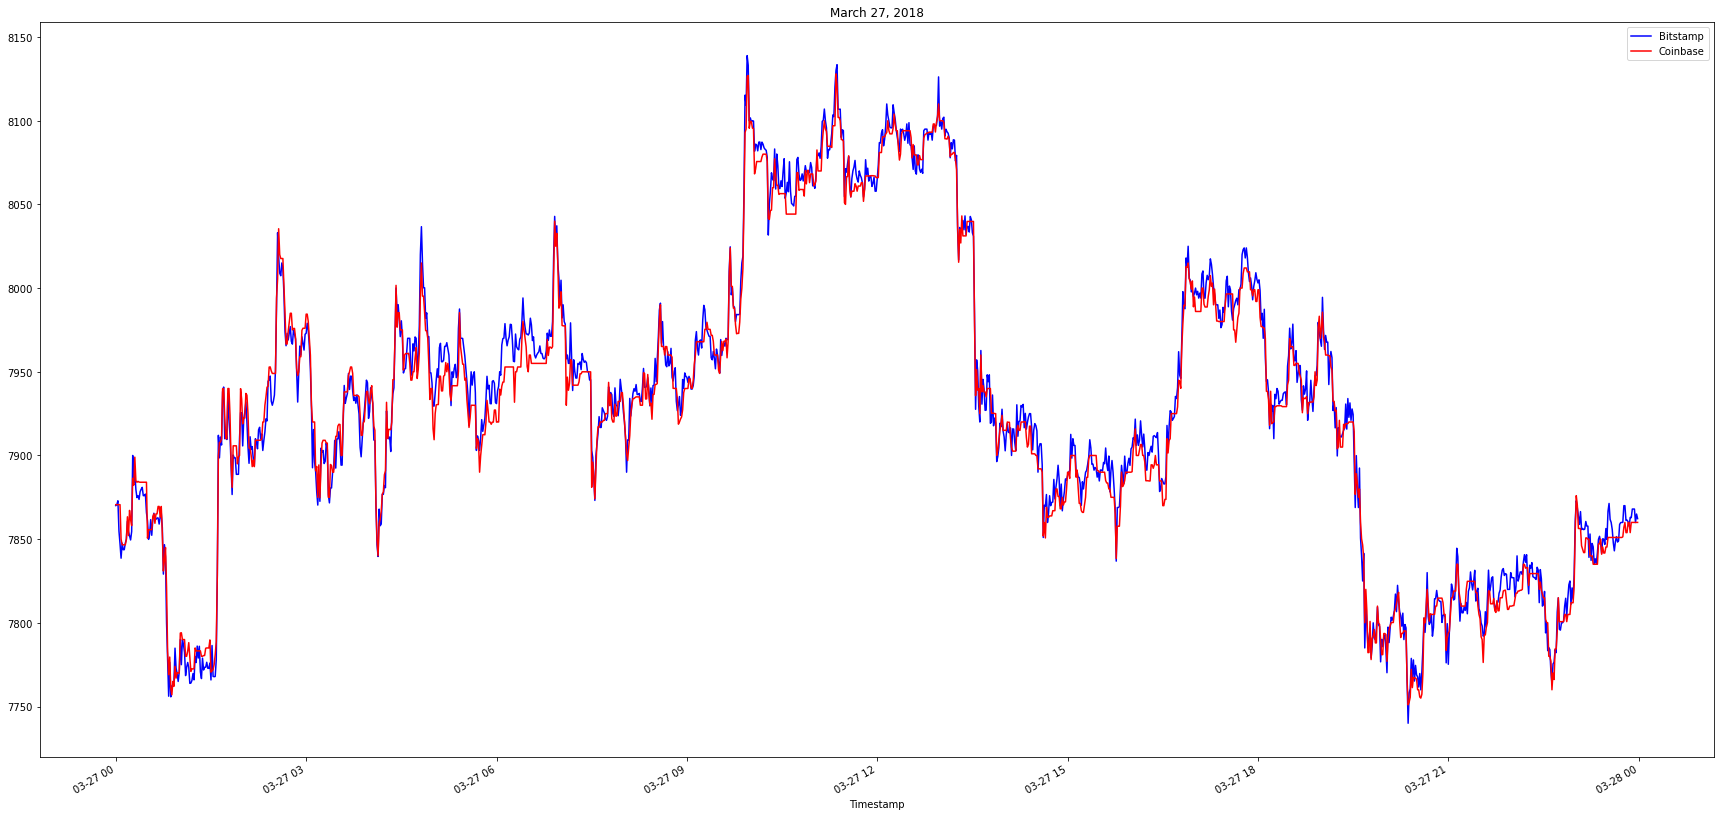

In [33]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced_late.plot(legend=True, figsize=(30, 15), title=late_slice_plot_title, color="blue", label="Bitstamp")
coinbase_sliced_late.plot(legend=True, figsize=(30, 15), color="red", label="Coinbase")

In [34]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced_late - bitstamp_sliced_late

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1438.000000
mean       -3.131384
std         8.748415
min       -31.270000
25%        -8.967500
50%        -3.340000
75%         2.837500
max        27.340000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

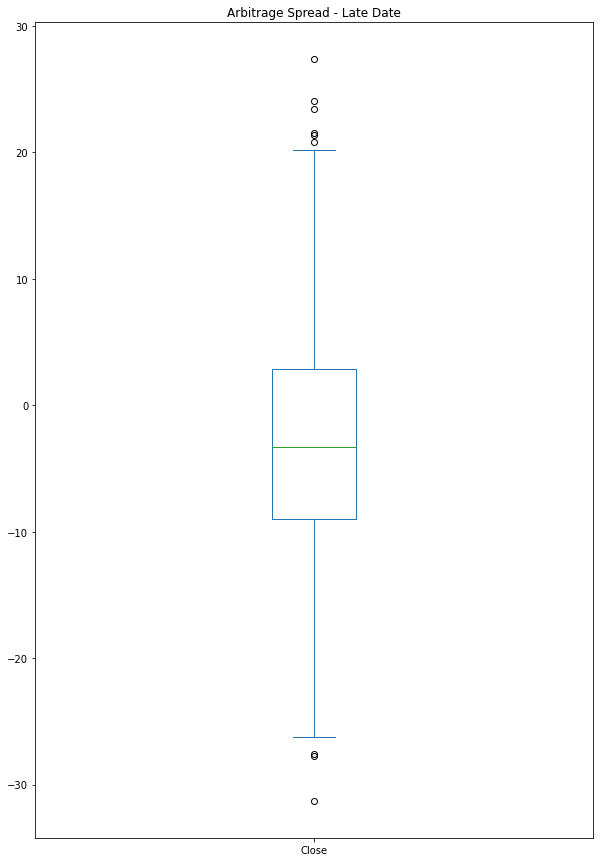

In [35]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', legend=True, figsize=(10, 15), title="Arbitrage Spread - Late Date", label="Close")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?


#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.


In [36]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced_early - bitstamp_sliced_early

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

In [37]:
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced_middle - bitstamp_sliced_middle

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe()

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

In [38]:
# For the date later in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced_late - bitstamp_sliced_late

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    512.000000
mean       6.019004
std        4.921254
min        0.010000
25%        2.195000
50%        4.995000
75%        8.225000
max       27.340000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [39]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp_sliced_early

# Review the spread return DataFrame
spread_return_early.describe()

count    9.600000e+02
mean     4.562087e-03
std      4.657344e-03
min      8.264463e-07
25%      1.786482e-03
50%      3.433578e-03
75%      5.898035e-03
max      5.163337e-02
Name: Close, dtype: float64

In [40]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced_middle

# Review the spread return DataFrame
spread_return_middle.describe()

count    713.000000
mean       0.002048
std        0.002133
min        0.000001
25%        0.000524
50%        0.001280
75%        0.002820
max        0.012726
Name: Close, dtype: float64

In [41]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp_sliced_late

# Review the spread return DataFrame
spread_return_late.describe()

count    512.000000
mean       0.000762
std        0.000625
min        0.000001
25%        0.000281
50%        0.000621
75%        0.001037
max        0.003464
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [42]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

In [43]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [44]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [45]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [46]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [47]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [48]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
Name: Close, dtype: float64

In [49]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_sliced_middle

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

In [50]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_sliced_late

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [51]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

In [52]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64

In [53]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

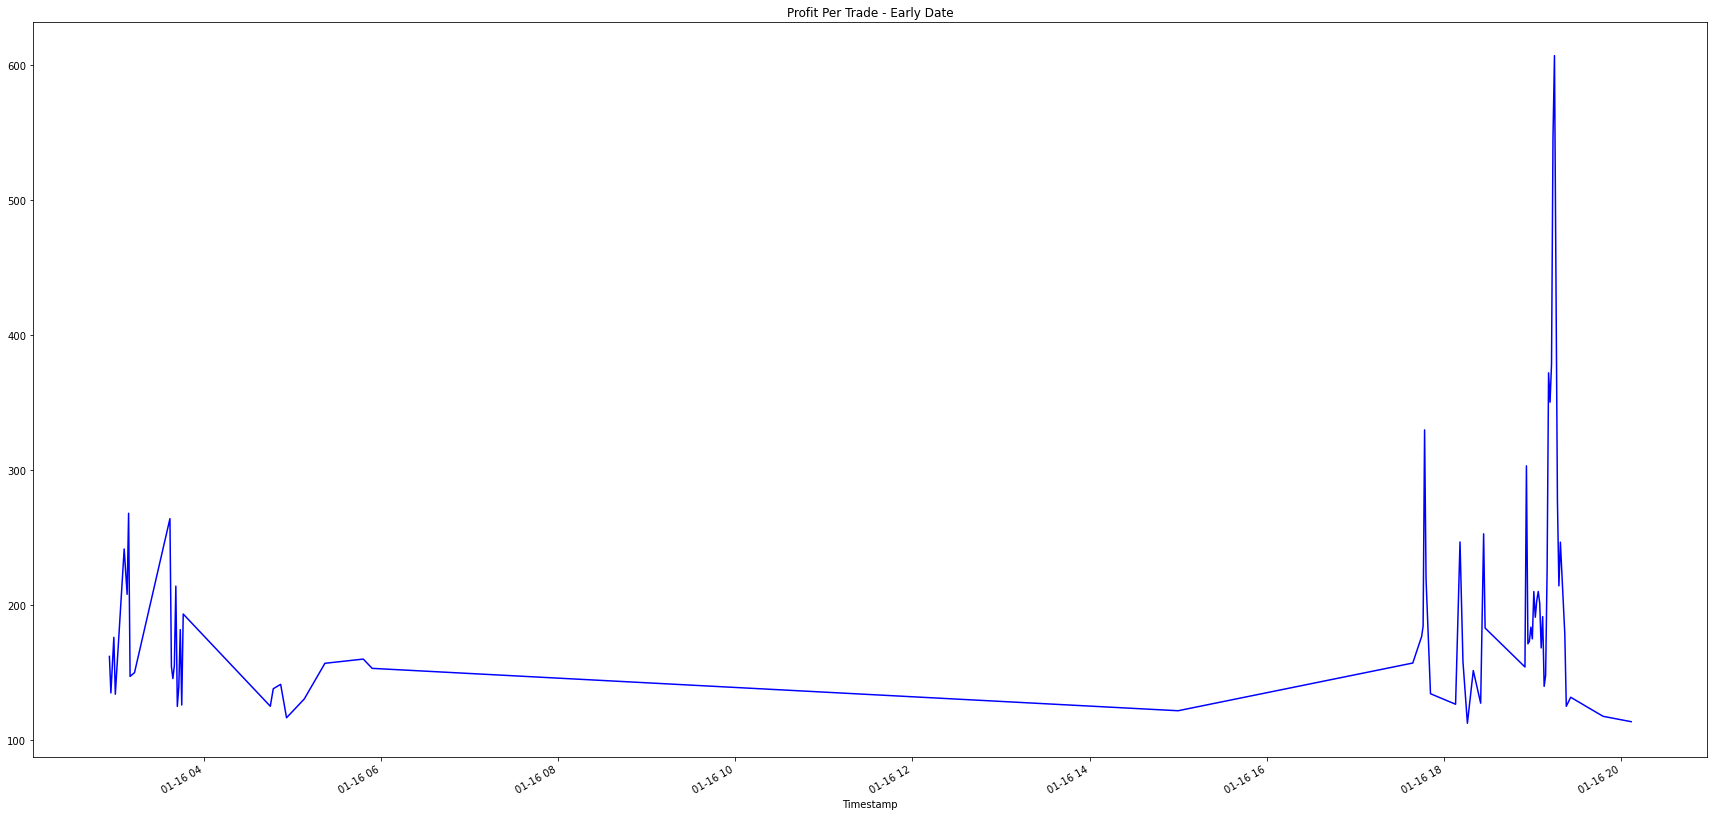

In [54]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(30, 15), title="Profit Per Trade - Early Date", color="blue")

<AxesSubplot:title={'center':'Profit Per Trade - Middle Date'}, xlabel='Timestamp'>

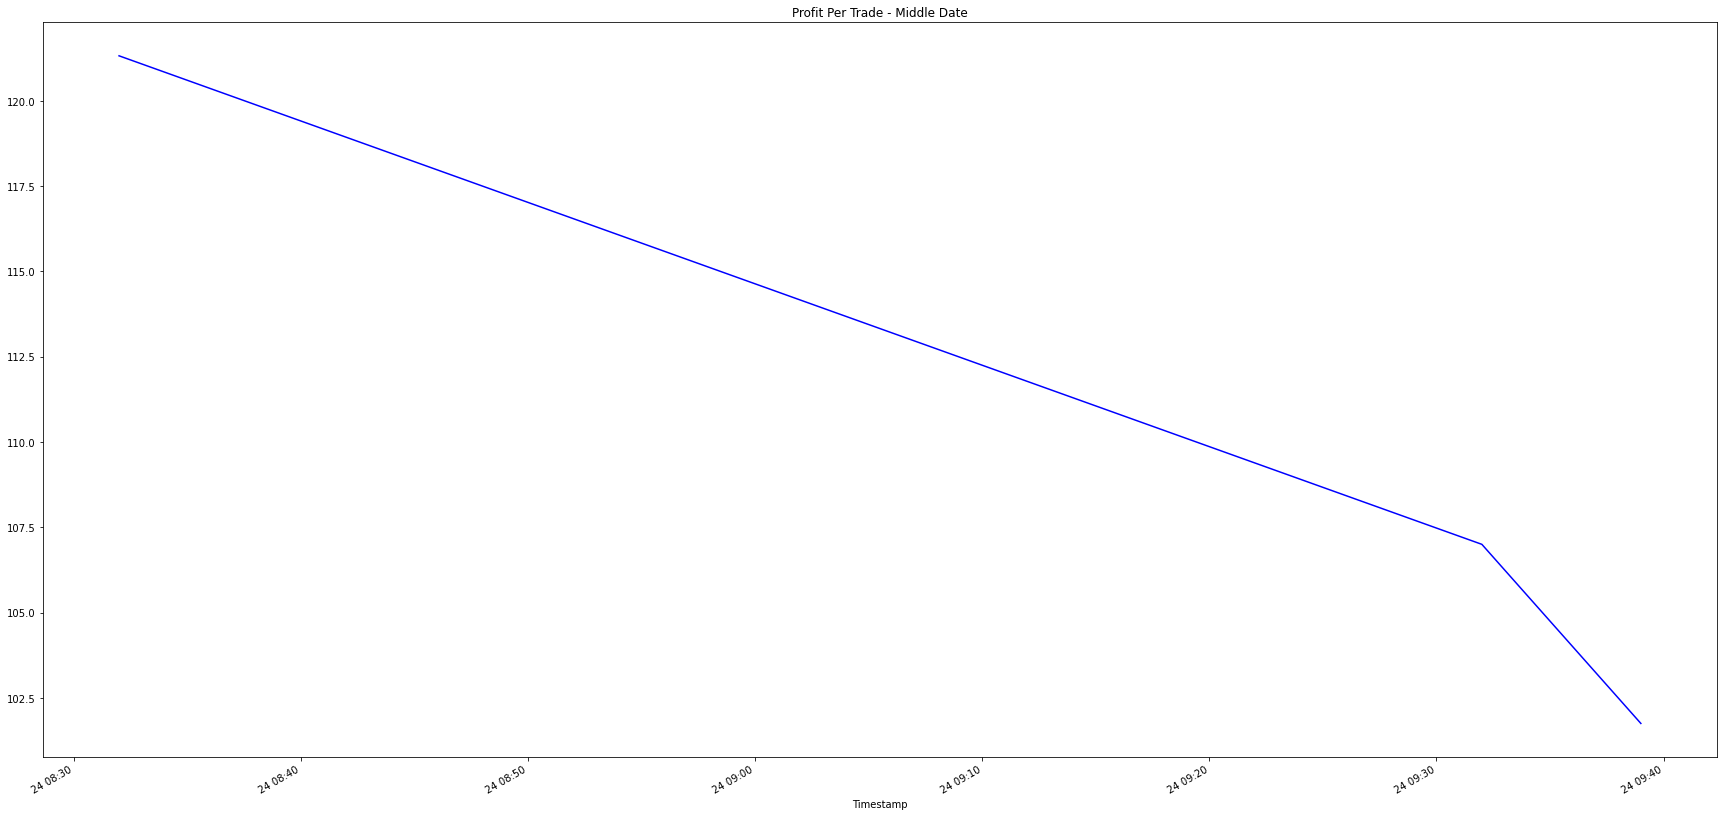

In [55]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(30, 15), title="Profit Per Trade - Middle Date", color="blue")

<AxesSubplot:title={'center':'Profit Per Trade - Late Date'}, xlabel='Timestamp'>

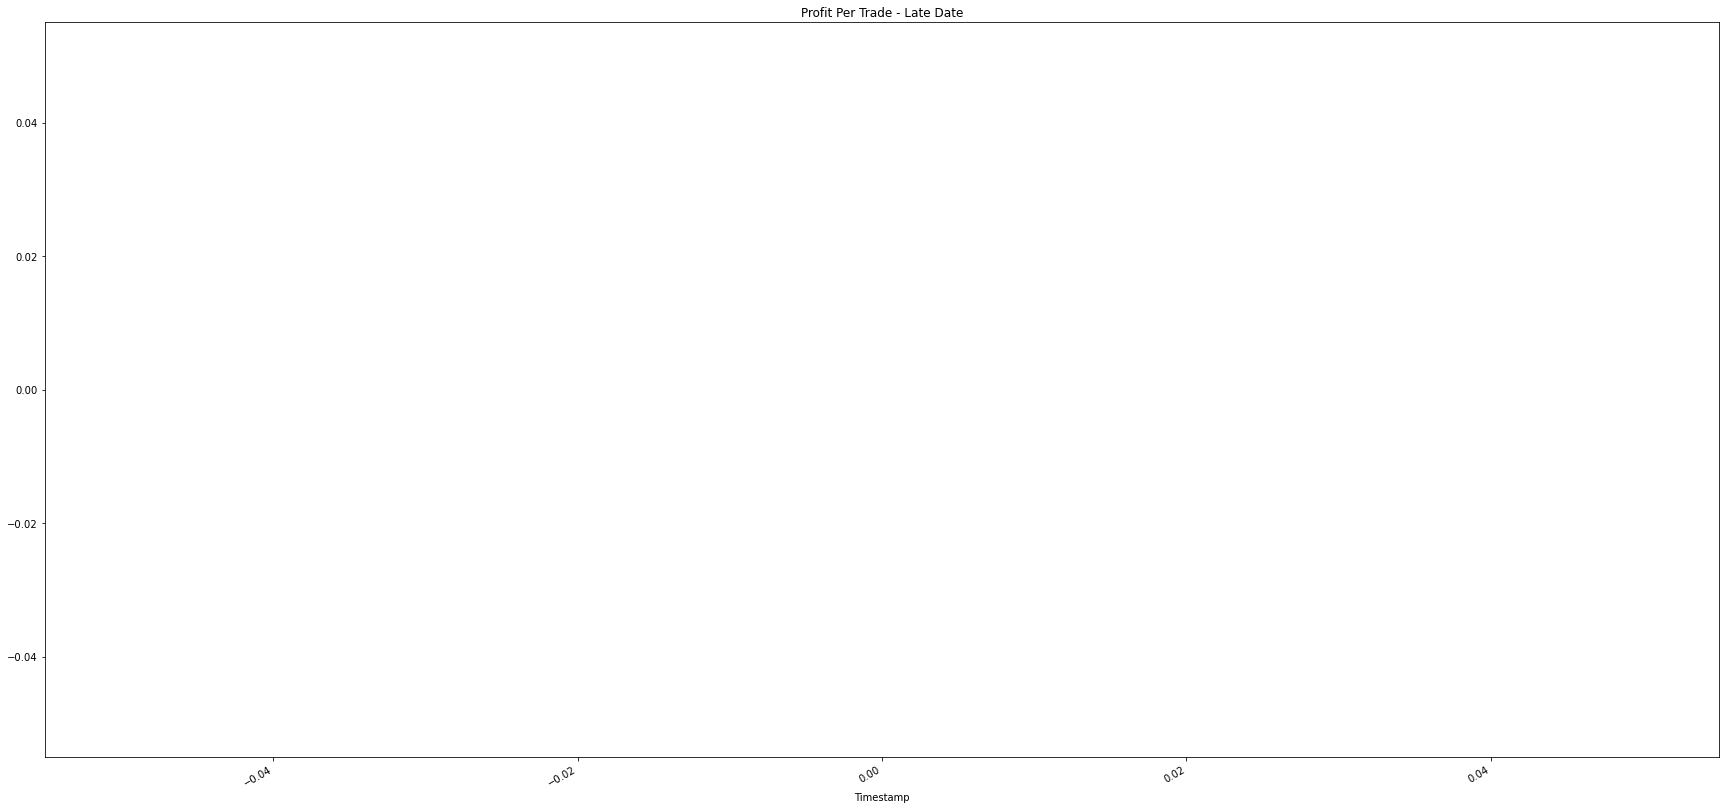

In [56]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize=(30, 15), title="Profit Per Trade - Late Date", color="blue")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [58]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early_sum = profit_per_trade_early.sum()
profit_early_sum

14147.169999999998

In [59]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_middle_sum = profit_per_trade_middle.sum()
profit_middle_sum

330.0699999999997

In [60]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_late_sum = profit_per_trade_late.sum()
profit_late_sum

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [61]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-16 02:56:00      162.01
2018-01-16 02:57:00      297.01
2018-01-16 02:59:00      473.14
2018-01-16 03:00:00      607.15
2018-01-16 03:06:00      848.69
                         ...   
2018-01-16 19:23:00    13660.06
2018-01-16 19:26:00    13791.84
2018-01-16 19:38:00    13915.85
2018-01-16 19:48:00    14033.48
2018-01-16 20:07:00    14147.17
Name: Close, Length: 73, dtype: float64

In [62]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    228.32
2018-02-24 09:39:00    330.07
Name: Close, dtype: float64

In [63]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Series([], Name: Close, dtype: float64)

Timestamp
2018-01-16 02:56:00      162.01
2018-01-16 02:57:00      297.01
2018-01-16 02:59:00      473.14
2018-01-16 03:00:00      607.15
2018-01-16 03:06:00      848.69
                         ...   
2018-01-16 19:23:00    13660.06
2018-01-16 19:26:00    13791.84
2018-01-16 19:38:00    13915.85
2018-01-16 19:48:00    14033.48
2018-01-16 20:07:00    14147.17
Name: Close, Length: 73, dtype: float64

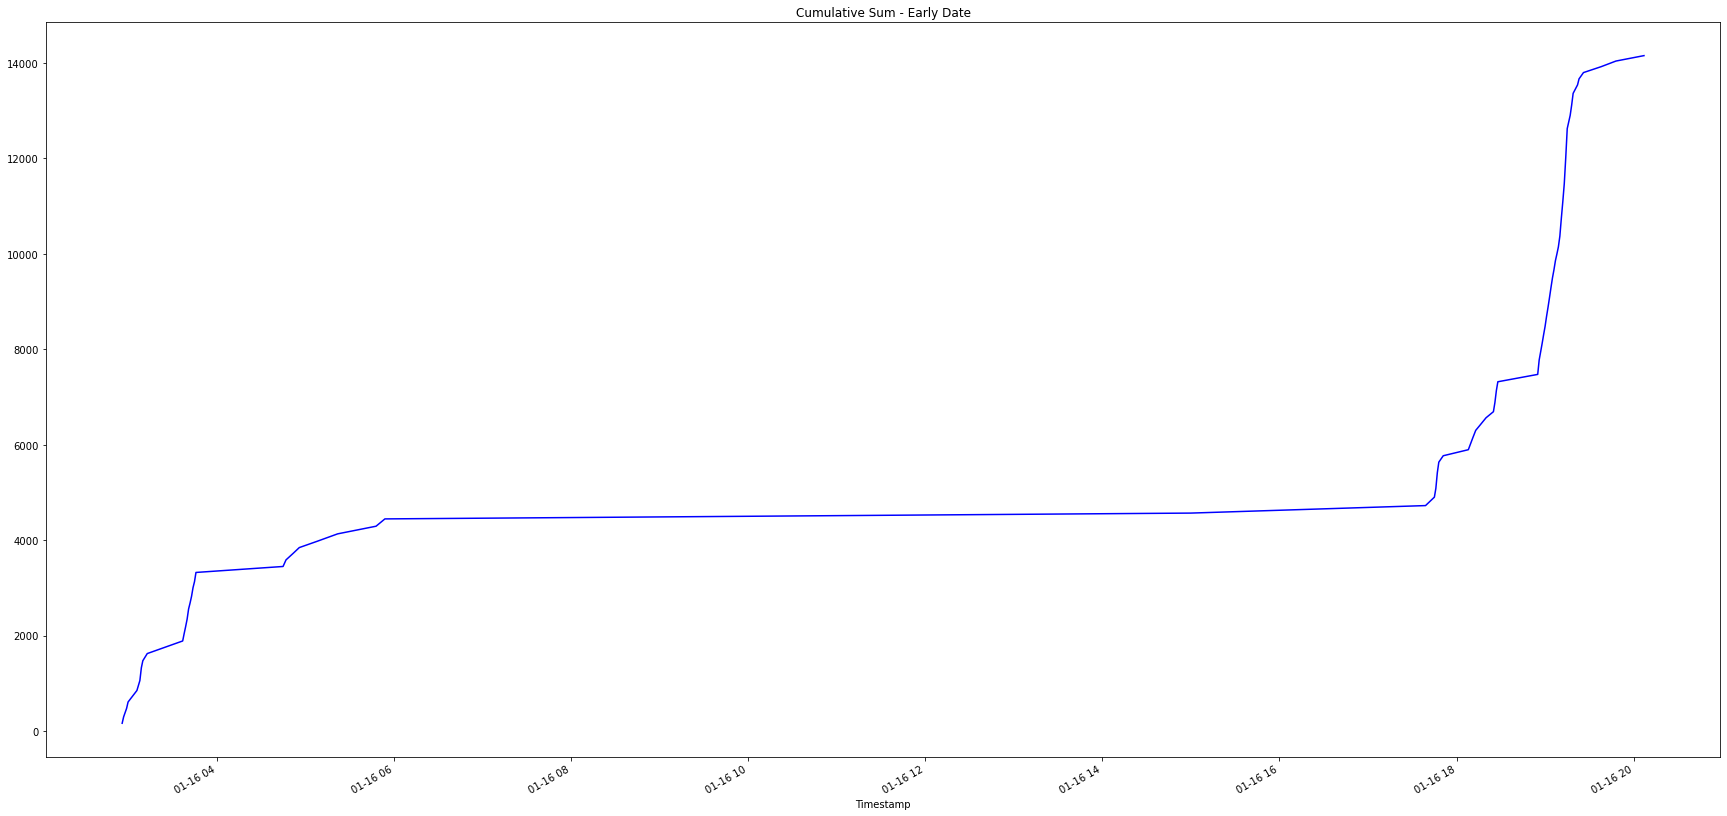

In [64]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(30, 15), title="Cumulative Sum - Early Date", color="blue")
cumulative_profit_early

<AxesSubplot:title={'center':'Cumulative Sum - Middle Date'}, xlabel='Timestamp'>

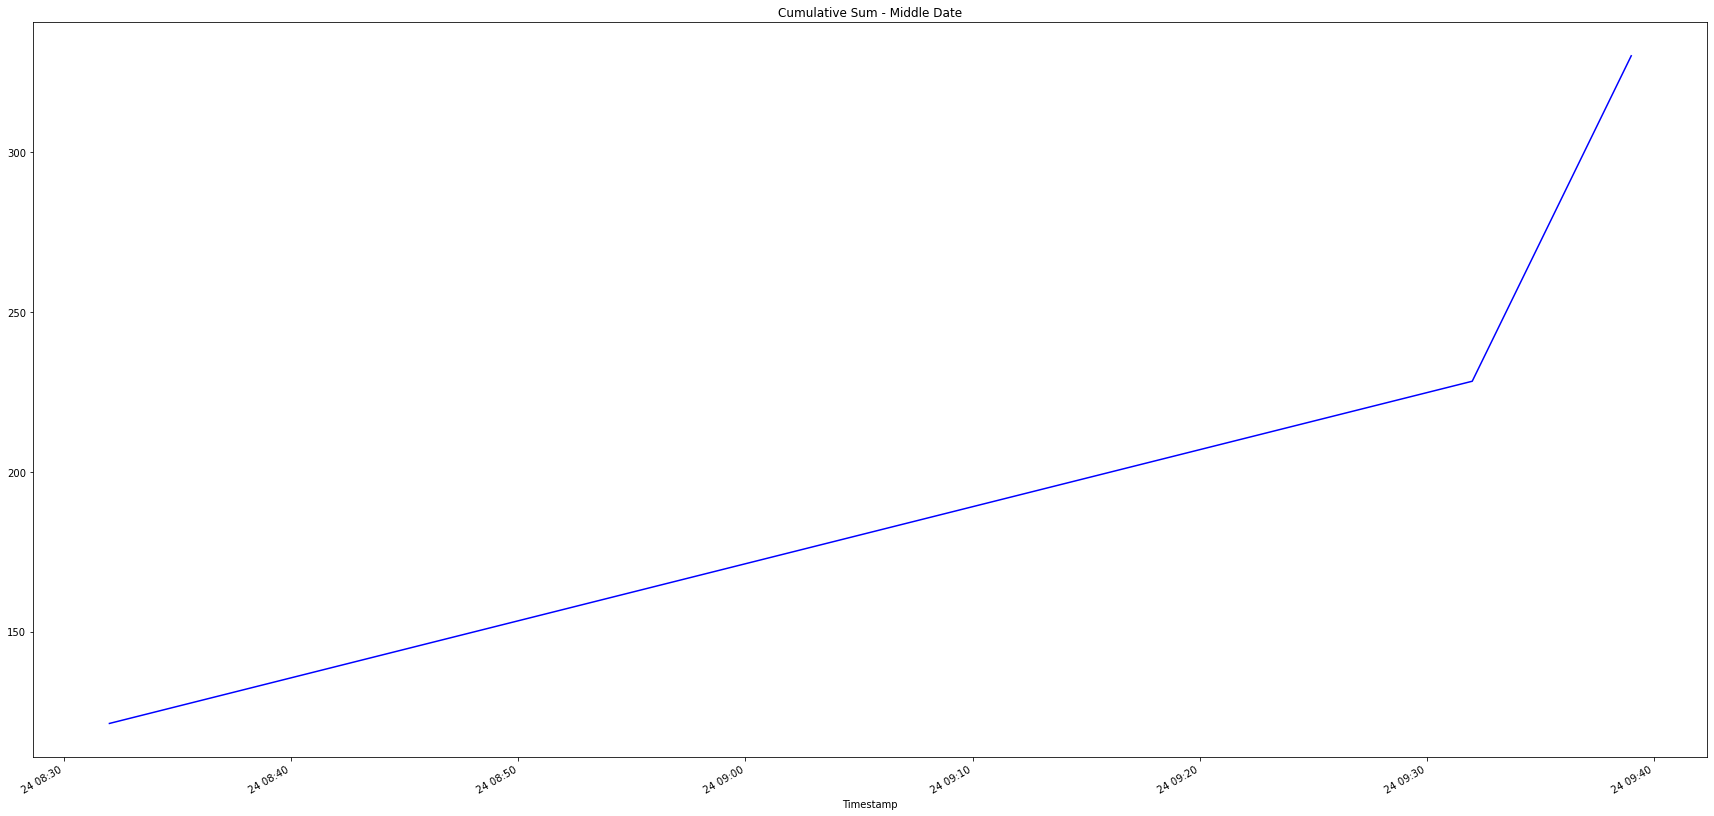

In [65]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(30, 15), title="Cumulative Sum - Middle Date", color="blue")

<AxesSubplot:title={'center':'Cumulative Sum - Late Date'}, xlabel='Timestamp'>

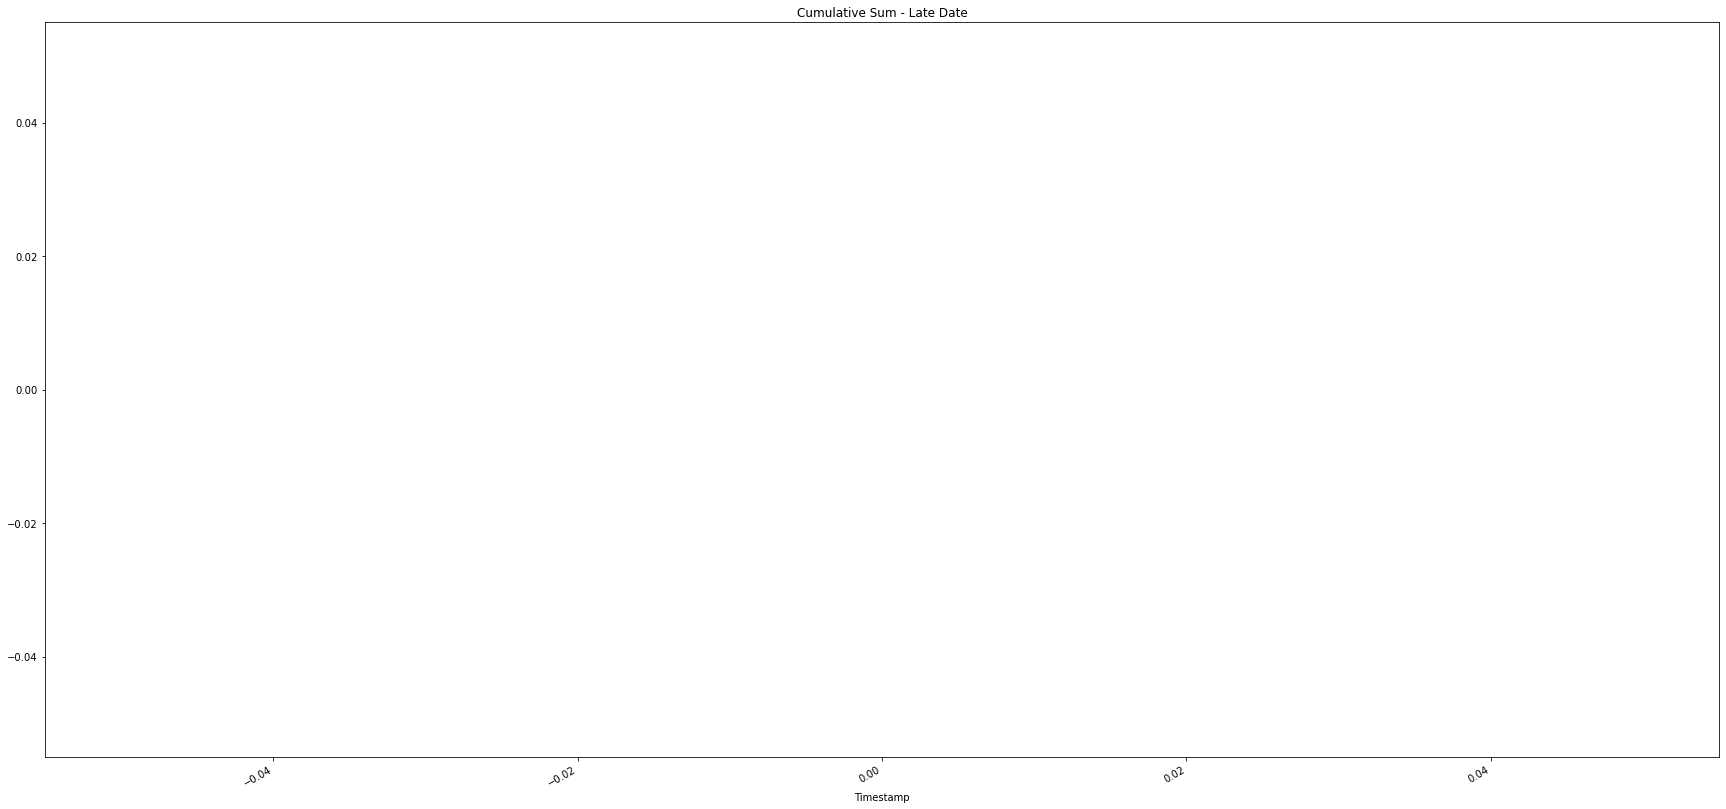

In [66]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_late.plot(figsize=(30, 15), title="Cumulative Sum - Late Date", color="blue")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Given the sampled dates, in January 2018, there is an average profit of 193.80. February 2018, there is an average profit of 110.02. By March, there was no profit at all. At the early date, the profit are higher. By midpoint, there were lesser profitable trades, lowering the profit by almost 45%. At the late date sample, there were no profitable trades, resulting to 0 profit.